# Lernen durch Verstärkung

[Bestärkendes Lernen](https://de.wikipedia.org/wiki/Best%C3%A4rkendes_Lernen) oder sog. [Reinforcement Learning](https://de.wikipedia.org/wiki/Best%C3%A4rkendes_Lernen) unterscheidet sich substanziell von den anderen Lernverfahren, weil es kein Modell benötigt. Stattdessen verbirgt sich dahinter eine *Strategie* (oder unterschiedliche je nach Ansatz).

Du wirst sehr viele komplexe Szenarien finden, in denen solche Lernverfahren eingesetzt werden können. Die Grundidee ist hingegen sehr einfach und lässt sich am besten an dem sog. [Multi-Armed Bandit](https://en.wikipedia.org/wiki/Multi-armed_bandit) erkunden.

Stell dir dazu vor, dass du dich in einem Casino in Las Vegas befindest und 1000 Dollar zur Verfügung hast, die du gerne möglichst gewinnbringend an zehn [einarmigen Banditen](https://de.wikipedia.org/wiki/Spielautomat#Die_Anf%C3%A4nge) einsetzen möchtest. 

Die Spielautomaten funktionieren so, dass du einen Dollar einwirfst. Wenn du gewinnst, erhältst du zwei Dollar; wenn du verlierst, ist der Dollar weg.

Für unser Beispiel gehst du davon aus, dass gesetzliche Beschränkungen den Casinobetreiber dazu zwingen, mit den Spielautomaten im Mittel *keinen Gewinn* erzielen zu dürfen.

Du hast nun unterschiedliche Möglichkeiten, wie du vorgehen kannst:

## Lösung durch *Exploration*

Du kannst jetzt in jeden Spielautomaten 100 Dollar einwerfen und überprüfen, wie viel Geld du von jedem zurückbekommen hast. Damit hast du ein statistisch gutes Bild davon, welcher Spielautomat am besten funktioniert.

Betrachte das nun an einem Beispiel. Du erzeugst zunächst zehn Spielautomaten mit unterschiedlichen Gewinnwahrscheinlichkeiten, die du *extra ungerecht* verteilst:

In [2]:
import random
def bandit(i):
    threshold = (i*2+1)/20
    if random.random() < threshold:
        return 2
    return 0

Die Funktion `bandit()` liefert für die Spielautomaten mit den Nummern `0-9` jeweils einen Gewinn mit den Wahrscheinlichkeiten `5%`, `15%`, ..., `95%` zurück. Im Mittel sind das `50%`, es ist also *fair* (und wäre für den Casinobetreiber ein schlechtes Geschäft).

Führe jetzt dein Experiment durch und stecke in jeden Automaten 100 Dollar:

In [3]:
import numpy as np

random.seed(42)
money = np.array([0]*10)
for b in range(10):
    for d in range(100):
        money[b] += bandit(b)

Wie viel Geld hast du zurück bekommen?

In [4]:
sum(money)

988

Das sieht für den Casinobetreiber doch gar nicht so schlecht aus, aber das liegt nur an der Statistik. Jetzt kannst du noch betrachten, welcher Automat dir wie viel Geld zurückgegeben hat:

<AxesSubplot:>

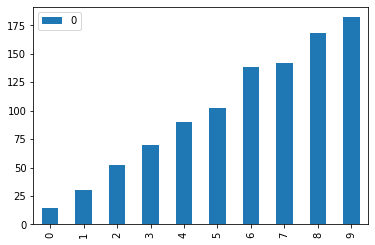

In [5]:
import pandas as pd
pd.DataFrame(money).plot.bar()

Das war eine sog. *Explorationsstrategie*, weil du absolut in die Breite gearbeitet hast. Du weißt nun mit größtmöglicher statistischer Sicherheit, welcher Automat welche Gewinnwahrscheinlichkeit hat.

Erkenntnistheoretisch ist das gut, aus wirtschaftlicher Sicht kannst du das aber besser machen.

## Lösung durch Ausbeutung (Exploitation)

Du kannst dir nun eine andere Strategie ausdenken. Zunächst wirfst du in jeden Automaten 10 Dollar und schaust, wie viel du zurück bekommst. Den Automaten, der dir am meisten zurückgibt, fütterst du überproportional mit mehr Geld.

Um zu verhindern, dass ein "schlechter" Automat dir nur zufällig viel Geld zurückgegeben hat, gibst du auch den augenscheinlich schlechteren Automaten noch ein bisschen Geld. Du berechnest immer wieder die Gewinnquote und justierst die Wahrscheilichkeiten immer neu, mit denen du Geld in die Automaten steckst.

Du startest mit der ersten Runde:

In [6]:
random.seed(42)
money = np.array([0]*10)
coins = np.array([0]*10)
for b in range(10):
    for d in range(10):
        money[b] += bandit(b)
        coins[b] += 1

Berechne nun den Erwartungswert für jeden Automaten:

In [7]:
money/coins

array([0.4, 0.4, 0.6, 0. , 1.6, 1.2, 1.2, 1.4, 1.6, 1.6])

In der nächsten Runde setzt du wieder 100 Dollar ein, allerdings verteilst du sie mehr an die Automaten, die dir mehr zurückgegeben haben. Dem "schlechtesten" Automaten gibst du einen Dollar, dem etwas besseren drei usw. Das ist der *Kern des Verfahrens*, nämlich die Strategie, wie du aus den bisherigen Erfahrungen die Belohnung verteilst.

Bei zehn Automaten verteilst du damit wieder 100 Dollar - wie gewünscht:

In [8]:
c = 1
for b in (money/coins).argsort():
    for d in range(c):
        money[b] += bandit(b)
        coins[b] += 1
    c += 2

Das kannst du auch nochmal überprüfen:

In [9]:
sum(coins)

200

Passt genau! Schau dir jetzt die Erwartungswerte an:

In [10]:
money/coins

array([0.30769231, 0.4       , 0.47058824, 0.18181818, 1.36      ,
       1.15789474, 1.14285714, 1.47826087, 1.7037037 , 1.72413793])

Auch das sieht schon besser aus, zumindest die "guten" Automaten haben sich durchgesetzt.

Du hast noch 800 Dollar zur Verfügung, daher kannst du das obige Verfahren einfach nochmal achtmal durchführen:

In [11]:
for r in range(8):
    c = 1
    for b in (money/coins).argsort():
        for d in range(c):
            money[b] += bandit(b)
            coins[b] += 1
        c += 2

Jetzt hast du 1000 Dollar verspielt:

In [12]:
sum(coins)

1000

Bist du mit dieser Strategie erfolgreicher gewesen?

In [13]:
sum(money)

1238

Absolut. Die Bank hast du noch nicht gesprengt, aber es ist schon mehr rausgekommen als du reingesteckt hast. Wie sehen die Erwartungswerte aus?

In [14]:
money/coins

array([0.19354839, 0.37288136, 0.43478261, 0.4       , 0.89320388,
       1.1047619 , 1.12396694, 1.41258741, 1.70552147, 1.91160221])

Die Reihenfolge hat sich verbessert, stimmt aber noch nicht ganz. Bei der Exploration konntest du genauere Abschätzungen finden, bei der Ausbeutung aber mehr verdienen. 

Betrachte zuletzt noch, wie viel Geld du in welchen Automaten gesteckt hast:

In [15]:
coins

array([ 31,  59,  69,  25, 103, 105, 121, 143, 163, 181])

## Sandkastenbeispiel für Reinforcement Learning

Reinforcement Learning kann ziemlich komplex werden. Die grundsätzliche Strategie hast du mit diesem Beispiel verstanden. Und obwohl das Verfahren einfach, ja geradezu banal klingt, wird es häufig eingesetzt. 

Wenn du z.B. viel im Internet bestellst, bist du wahrscheinlich selbst schon *Opfer der Ausbeutung* geworden. Online-Shops verwenden den gleichen Prozess, um unterschiedliche Varianten des Bestellprozesses zu testen (sog. A/B-Tests). Der mit der höheren *Conversion Rate* wird dabei immer bevorzugt - genau wie in dem Beispiel oben.